<a href="https://colab.research.google.com/github/kabirodavies/data-project/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import dependencies and load csv 
Import pandas, matplotlib, seaborn, and datetime dependencies

In [1]:
pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584 kB 7.3 MB/s 


In [2]:
import pandas as pd
from time import strftime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read Data
users_sessions_url = 'https://raw.githubusercontent.com/kabirodavies/data-project/main/user_sessions.csv'
users = pd.read_csv(users_sessions_url, encoding = 'utf8')

In [4]:
# Checking the shape (# No of columns and rows) of the dataset
users.shape

(11880, 25)

In [5]:
# Checking the names of columns
users.columns

Index(['session_id', 'datetime', 'supply_id', 'ip', 'user_device_id',
       'app_name', 'app_bundle', 'app_ver', 'channel_id', 'full_user_agent',
       'os_name', 'os_family', 'country', 'city', 'isp', 'carrier_id',
       'connection_type', 'region', 'device_type', 'ua_family', 'platform',
       'player_type', 'admanager_type', 'additional_data', 'default_language'],
      dtype='object')

In [6]:
# Checking for columns with missing or null values
users.isnull().sum(axis=0)

session_id              0
datetime                0
supply_id           10851
ip                      0
user_device_id        679
app_name                0
app_bundle             18
app_ver                 0
channel_id              0
full_user_agent         0
os_name              7868
os_family            7868
country                 2
city                  358
isp                    11
carrier_id             20
connection_type        59
region                340
device_type          7602
ua_family            9008
platform             7601
player_type          8189
admanager_type      11880
additional_data      2034
default_language        0
dtype: int64

# Data Engineering

In [7]:
# Checking the datatypes of the columns in the dataset 
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11880 entries, 0 to 11879
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   session_id        11880 non-null  object 
 1   datetime          11880 non-null  object 
 2   supply_id         1029 non-null   float64
 3   ip                11880 non-null  object 
 4   user_device_id    11201 non-null  object 
 5   app_name          11880 non-null  object 
 6   app_bundle        11862 non-null  object 
 7   app_ver           11880 non-null  object 
 8   channel_id        11880 non-null  object 
 9   full_user_agent   11880 non-null  object 
 10  os_name           4012 non-null   object 
 11  os_family         4012 non-null   object 
 12  country           11878 non-null  object 
 13  city              11522 non-null  object 
 14  isp               11869 non-null  object 
 15  carrier_id        11860 non-null  float64
 16  connection_type   11821 non-null  object

In [8]:
#Change 'datetime' datatype from object to datetime
users['datetime'] =  pd.to_datetime(users['datetime'])

In [9]:
users['datetime']

0       2022-08-05 23:25:07.629000+00:00
1       2022-08-05 22:08:45.281000+00:00
2       2022-08-05 22:11:08.906000+00:00
3       2022-08-05 22:05:35.273000+00:00
4       2022-08-05 21:10:47.448000+00:00
                      ...               
11875   2022-08-21 06:24:49.144000+00:00
11876   2022-08-21 12:47:42.816000+00:00
11877   2022-08-21 10:39:19.457000+00:00
11878   2022-08-21 02:20:09.202000+00:00
11879   2022-08-21 19:53:30.537000+00:00
Name: datetime, Length: 11880, dtype: datetime64[ns, UTC]

In [10]:
# Extracting only date from the datetime column
users['date'] = pd.to_datetime(users['datetime'], format="%Y/%m/%d %H:%M").dt.date
users['date'] =  pd.to_datetime(users['date'])

In [11]:
#Cheking the minimun and maximum dates and the time difference in days
dates = "The First date is {}, And The last date is {}".format(users['date'].min(), users['date'].max())
print(dates)

#Time difference in days
time_diff_days = users['date'].max() - users['date'].min()
print('Time Difference is', time_diff_days)

The First date is 2022-08-04 00:00:00, And The last date is 2022-10-20 00:00:00
Time Difference is 77 days 00:00:00


In [12]:
#Transforming the default_language column to have a uniform label for English
users['default_language'] = users['default_language'].replace(['en', 'en-us'], 'English')

# Checking for Data Integrity in columns of interest

**When a value occurs too many times it is worth investigating it futher. The choice of a column to user to identify a user is important.**

In [13]:
# Number of times user_device_id has occured 
users['user_device_id'].value_counts(sort=True) 

6B2848FC-05A4-4E27-A032-28A033AFE5DE    7601
02:00:00:00:00:00                         89
cb3de4e3-1e92-4422-a18d-003a930a7438       4
065cbf4b-6ccb-51e7-bed5-d6ccc695e747       3
ff016244-4894-a65f-596c-c3ce92b2049a       3
                                        ... 
1019040057                                 1
1007668544                                 1
1062439763                                 1
3fd46456-ab95-5d17-9c16-0f1ba738272a       1
ewBZPNeiQES1UfAqzPMkuL                     1
Name: user_device_id, Length: 3438, dtype: int64

In [14]:
# Number of times ip has occured 
users['ip'].value_counts(sort=True) 

178.118.24.64                              7601
176.112.65.246                               10
36.255.44.74                                  4
154.27.65.112                                 4
46.39.65.243                                  3
                                           ... 
109.101.200.58                                1
2600:1005:b15e:597a:e436:8c9e:7981:51e0       1
2402:800:63b4:e6b2:10ec:aefa:97d3:da91        1
154.121.31.241                                1
185.183.107.142                               1
Name: ip, Length: 4166, dtype: int64

# Investigating user with 7601 records

In [15]:
# Investigating 178.118.24.64 with 7601 records
device_id_one = users[users['ip'] == '178.118.24.64'] 
device_id_one.head()

,session_id,datetime,supply_id,ip,user_device_id,app_name,app_bundle,app_ver,channel_id,full_user_agent,...,connection_type,region,device_type,ua_family,platform,player_type,admanager_type,additional_data,default_language,date
78,5.2.7,2022-10-20 08:59:23.669000+00:00,NaN,178.118.24.64,6B2848FC-05A4-4E27-A032-28A033AFE5DE,FashionTV%2B,com.appletv.ftv,5.2.7,1235,Fashion Tv/5.2.7 (com.fashiontvplus.multistrea...,...,Cable/DSL,West Flanders Province,NaN,NaN,NaN,NaN,NaN,"[{""internal_ip"":""[internal_ip]""}]",English,2022-10-20
79,5.2.7,2022-10-20 09:34:15.711000+00:00,NaN,178.118.24.64,6B2848FC-05A4-4E27-A032-28A033AFE5DE,FashionTV%2B,com.appletv.ftv,5.2.7,1235,Fashion Tv/5.2.7 (com.fashiontvplus.multistrea...,...,Cable/DSL,West Flanders Province,NaN,NaN,NaN,NaN,NaN,"[{""internal_ip"":""[internal_ip]""}]",English,2022-10-20
80,5.2.7,2022-10-20 11:44:50.258000+00:00,NaN,178.118.24.64,6B2848FC-05A4-4E27-A032-28A033AFE5DE,FashionTV%2B,com.appletv.ftv,5.2.7,1235,Fashion Tv/5.2.7 (com.fashiontvplus.multistrea...,...,Cable/DSL,West Flanders Province,NaN,NaN,NaN,NaN,NaN,"[{""internal_ip"":""[internal_ip]""}]",English,2022-10-20
81,5.2.7,2022-10-20 10:32:41.610000+00:00,NaN,178.118.24.64,6B2848FC-05A4-4E27-A032-28A033AFE5DE,FashionTV%2B,com.appletv.ftv,5.2.7,1235,Fashion Tv/5.2.7 (com.fashiontvplus.multistrea...,...,Cable/DSL,West Flanders Province,NaN,NaN,NaN,NaN,NaN,"[{""internal_ip"":""[internal_ip]""}]",English,2022-10-20
82,5.2.7,2022-10-20 11:53:27.485000+00:00,NaN,178.118.24.64,6B2848FC-05A4-4E27-A032-28A033AFE5DE,FashionTV%2B,com.appletv.ftv,5.2.7,1235,Fashion Tv/5.2.7 (com.fashiontvplus.multistrea...,...,Cable/DSL,West Flanders Province,NaN,NaN,NaN,NaN,NaN,"[{""internal_ip"":""[internal_ip]""}]",English,2022-10-20


In [16]:
#Cheking the minimun and maximum dates and the time difference in days
device_id_one_dates = "The First date is {}, And The last date is {}".format(device_id_one['datetime'].min(), device_id_one['datetime'].max())
print(dates)

#Time difference in days
one_time_diff_days = device_id_one['datetime'].max() - device_id_one['datetime'].min()
print('Time Difference is', one_time_diff_days)

The First date is 2022-08-04 00:00:00, And The last date is 2022-10-20 00:00:00
Time Difference is 0 days 05:23:16.458000


In [17]:
device_id_one.shape

(7601, 26)

**It's highly unlikely a user visited the app or apps 7601 times in a duration of five hours. Untill I understand better why this happened, I will drop this user**

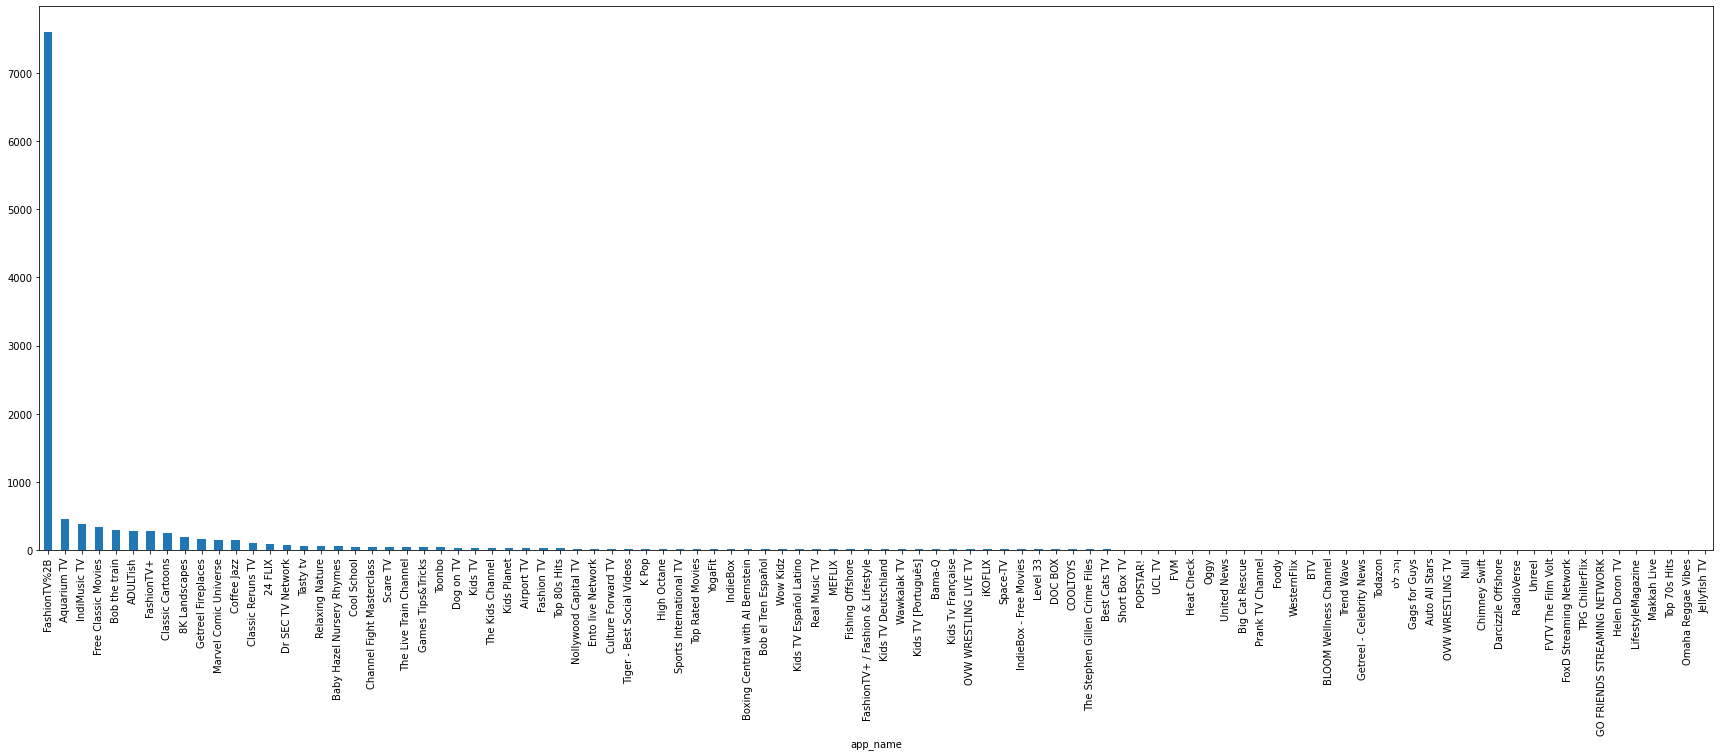

In [18]:
#check user frequency
#calculate sum of values by group
df_name_freq = users.groupby(['app_name'])['ip'].size()

#create bar plot by group
df_name_freq = df_name_freq.sort_values(ascending=False)
df_name_freq.plot(kind='bar',  figsize=(30, 10))

In [19]:
# #Filter out records of ip 178.118.24.64
df_filtered = users[users['ip'] != '178.118.24.64'] 

In [20]:
df_filtered.shape

(4279, 26)


# Investigating user with 89 records
**For this user the ip addresss is unique and can be used to differentiate users.**


In [21]:
# Investigating user_device_id '02:00:00:00:00:00'
device_id_two = users[users['user_device_id'] == '02:00:00:00:00:00'] 
device_id_two.head()

,session_id,datetime,supply_id,ip,user_device_id,app_name,app_bundle,app_ver,channel_id,full_user_agent,...,connection_type,region,device_type,ua_family,platform,player_type,admanager_type,additional_data,default_language,date
178,1659891270189,2022-08-07 16:54:32.867000+00:00,1079.0,50.64.176.70,02:00:00:00:00:00,Classic Reruns TV,com.amazon.classicreruns,5.1.8,B099F57QGP,okhttp/3.10.0,...,Cable/DSL,British Columbia,Unrecognized,OkHttp,AndroidTV,Exoplayer,NaN,"[{""device_info"":""8p""}]",中文,2022-08-07
491,1664070165976,2022-09-25 01:42:47.610000+00:00,1079.0,2603:90c8:1:95ef:98ca:1e6e:c336:fa4e,02:00:00:00:00:00,Dr SEC TV Network,B08FMRKQ78,5.1.6,B08FMRKQ78,okhttp/3.10.0,...,Cable/DSL,Alabama,Unrecognized,OkHttp,AmazonTV,Exoplayer,NaN,"[{""device_info"":""aftss""}]",English,2022-09-25
492,1664067596494,2022-09-25 00:59:57.057000+00:00,1079.0,162.81.182.39,02:00:00:00:00:00,Dr SEC TV Network,B08FMRKQ78,5.1.6,B08FMRKQ78,okhttp/3.10.0,...,NaN,NaN,Unrecognized,OkHttp,AmazonTV,Exoplayer,NaN,"[{""device_info"":""aftmm""}]",English,2022-09-25
513,1666154251949,2022-10-19 04:37:38.757000+00:00,1079.0,2804:18:580f:3ff2:1:0:52d5:790b,02:00:00:00:00:00,United News,com.andromobile.unitednews,5.1.8,com.andromobile.unitednews,okhttp/3.10.0,...,Cellular,Rio de Janeiro,Unrecognized,OkHttp,AndroidMobile,Exoplayer,NaN,"[{""placement_id"":""23552196""},{""device_info"":""s...",português,2022-10-19
543,1662853712521,2022-09-10 23:48:33.296000+00:00,1079.0,2600:1700:3c70:32f0:74ac:4893:f1:57be,02:00:00:00:00:00,Dr SEC TV Network,B08FMRKQ78,5.1.6,B08FMRKQ78,okhttp/3.10.0,...,Cable/DSL,Louisiana,Unrecognized,OkHttp,AmazonTV,Exoplayer,NaN,"[{""device_info"":""aftmm""}]",English,2022-09-10


#Selecting Columns Neccessary For The Analysis

In [22]:
# Checking the names of columns
df_filtered.columns

Index(['session_id', 'datetime', 'supply_id', 'ip', 'user_device_id',
       'app_name', 'app_bundle', 'app_ver', 'channel_id', 'full_user_agent',
       'os_name', 'os_family', 'country', 'city', 'isp', 'carrier_id',
       'connection_type', 'region', 'device_type', 'ua_family', 'platform',
       'player_type', 'admanager_type', 'additional_data', 'default_language',
       'date'],
      dtype='object')

In [23]:
# df_filtered[df_filtered['ip'] == '178.118.24.64']

### Selecting only wanted columns
**The Aim of this analysis is to check for user frequency and user recency to determine the most valiable users and users churn likelyhood.**
**Date and IP columns are the most important to compute for recency and frequency. Other Columns can be used for further analysi of user behaviour**


In [65]:
# Select columns neccessary for this analysis
necessary_cols = ['date', 'ip', 'app_name', 'app_ver', 'isp', 'connection_type', 'default_language', 'revenue']
data = df_filtered[necessary_cols]
data.head()

,date,ip,app_name,app_ver,isp,connection_type,default_language,revenue
0,2022-08-05,97.118.20.38,Aquarium TV,V_s5.1.9b,CenturyLink,Cable/DSL,English,15
1,2022-08-05,189.203.104.188,ADULTish,V_s5.1.9b,Totalplay,Cable/DSL,English,15
2,2022-08-05,81.111.134.45,Aquarium TV,5.8.4,Virgin Media,Cable/DSL,English,15
3,2022-08-05,36.68.10.202,Culture Forward TV,5.8.4,PT Telkom Indonesia,Cable/DSL,English,15
4,2022-08-05,216.238.178.89,Aquarium TV,5.2.0,Auburn Essential Services,Cable/DSL,English,15


In [66]:
data.isnull().sum()

date                 0
ip                   0
app_name             0
app_ver              0
isp                 11
connection_type     59
default_language     0
revenue              0
dtype: int64

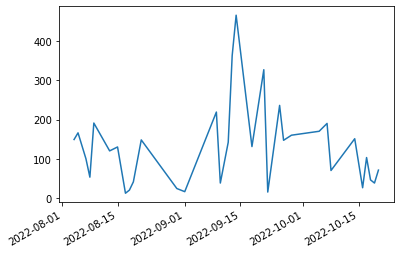

In [67]:
data.date.value_counts().plot()


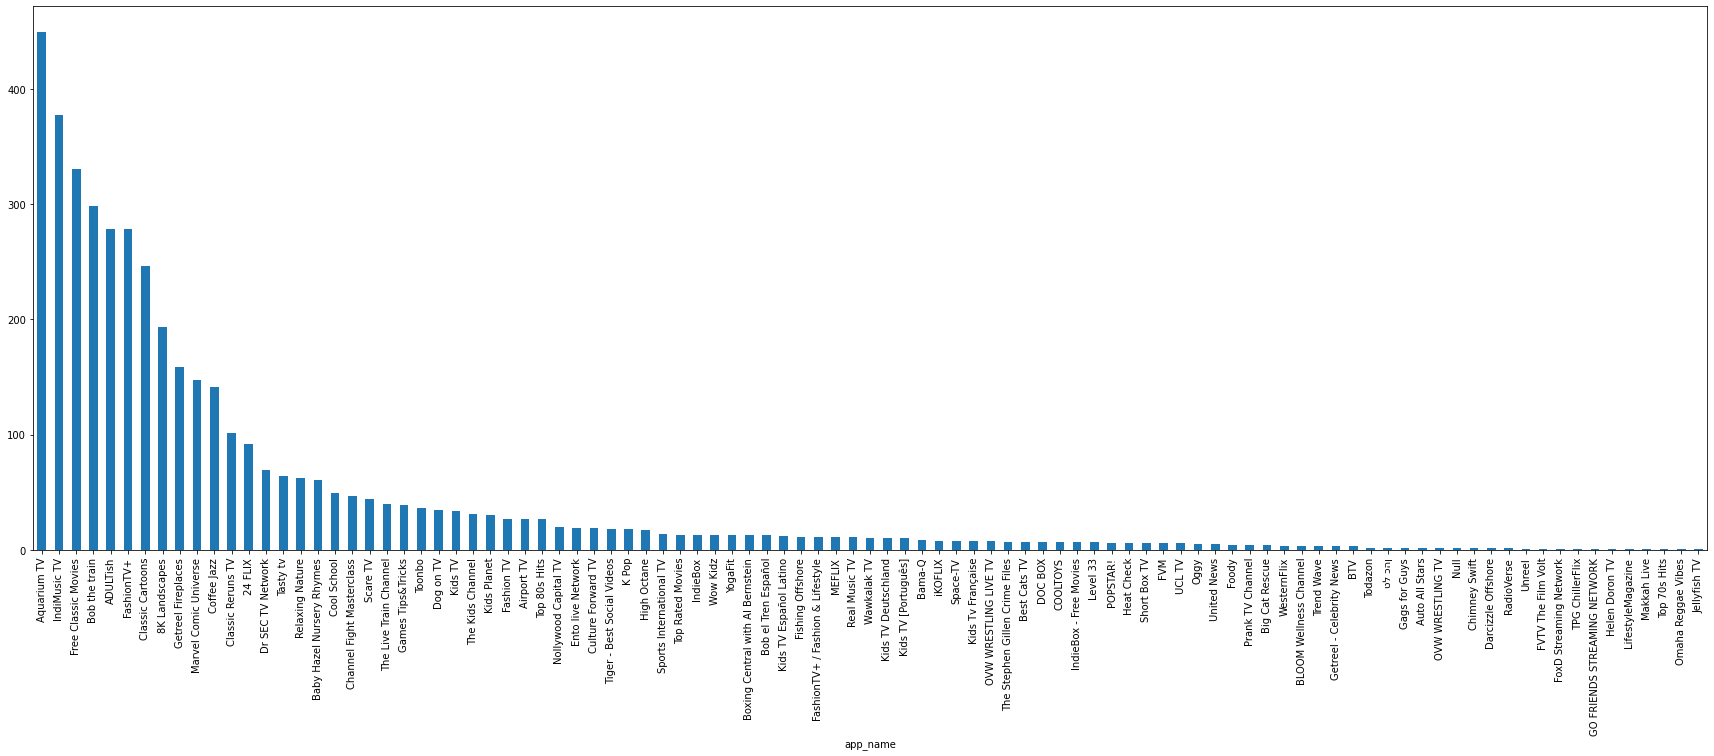

In [68]:
#check user frequency of users 
#calculate count of values by group
df_name_freq = data.groupby(['app_name'])['ip'].count()

#create bar plot by group
df_name_freq = df_name_freq.sort_values(ascending=False)
df_name_freq.plot(kind='bar',  figsize=(30, 10))

#Churn
Any user who visits any of the applications, details like user_id and ip are recorded. We are going to check over the duration of 77 days the frequency of returning users.
Users who visited only once are going to be classified as users who churned.

*   **Churn = Lost Customers ÷ Total Customers**





#Checking count of repeating ips

In [69]:
#Print records existing unique user ips
print(data['ip'].nunique())

4165


In [70]:
#Checking for users who visited at least once
data['ip'].value_counts()
visit_once = data['ip'].value_counts().loc[lambda x : x==1]
len(visit_once)

4070

In [71]:
# Checking for users who visited more than once
returning_users = data['ip'].value_counts().loc[lambda x : x!=1]
len(returning_users)

95

In [72]:
#Check the Last app visit date
last_visit_date = data['date'].dt.date.max()
print(last_visit_date)

2022-10-20


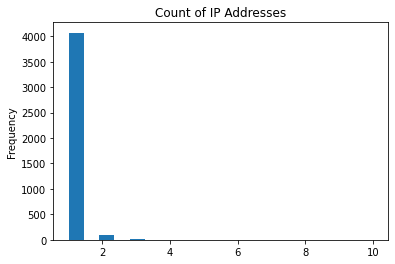

In [73]:
data['ip'].value_counts().plot(kind='hist', bins=20, title='Count of IP Addresses')

In [74]:
from lifetimes.plotting import *
from lifetimes.utils import *
#Built-in utility functions from lifetimes package to transform the transactional data (one row per visit) 
#into summary data (frequency, recency, and age)

data_df = summary_data_from_transaction_data(data, 'ip', 'date', observation_period_end='2022-10-20')
data_df = data_df.reset_index()
data_df.head()

,ip,frequency,recency,T
0,1.123.101.22,0.0,0.0,0.0
1,1.123.147.77,0.0,0.0,24.0
2,1.147.96.230,0.0,0.0,13.0
3,1.152.109.42,0.0,0.0,22.0
4,1.157.5.57,0.0,0.0,0.0


**Context**
*   **Frequency: represents count of times a user visits**
*   **Recency: represents time in days since a user last visited**
*   **T: represents time in days since a user last visited from the last day**






In [ ]:
data_df.shape

(4166, 4)

In [ ]:
data_df['recency'].max(), data_df['frequency'].max(), 

(74.0, 3.0)

count    4165.000000
mean        0.012485
std         0.121382
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of users visiting only once: 98.85 %


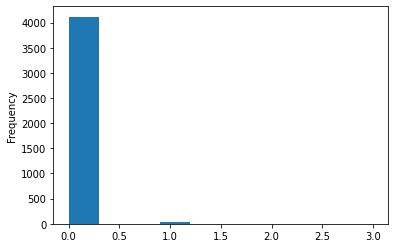

In [40]:
%matplotlib inline
#Create histogram to find out how many customers purchased item only once.
data_df['frequency'].plot(kind='hist', bins=10)
print(data_df['frequency'].describe())
print("---------------------------------------")
one_time_visitors = round(sum(data_df['frequency'] == 0)/float(len(data_df))*(100),2)
print("Percentage of users visiting only once:", one_time_visitors ,"%")

In [ ]:
data_df['frequency'].value_counts()

0.0    4118
1.0      45
2.0       2
3.0       1
Name: frequency, dtype: int64

In [ ]:
data['ip'].value_counts(ascending=False)

178.118.24.64                              7601
176.112.65.246                               10
36.255.44.74                                  4
154.27.65.112                                 4
46.39.65.243                                  3
                                           ... 
109.101.200.58                                1
2600:1005:b15e:597a:e436:8c9e:7981:51e0       1
2402:800:63b4:e6b2:10ec:aefa:97d3:da91        1
154.121.31.241                                1
185.183.107.142                               1
Name: ip, Length: 4166, dtype: int64

In [42]:
#Frequency/Recency Analysis Using the BG/NBD Model
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(data_df['frequency'], data_df['recency'], data_df['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 4165 subjects, a: 1.10, alpha: 5.80, b: 0.14, r: 0.01>


In [43]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.006260,0.002019,0.002303,0.010218
alpha,5.795297,3.866566,-1.783172,13.373765
a,1.102556,1.877163,-2.576682,4.781795
b,0.138199,0.254711,-0.361034,0.637432


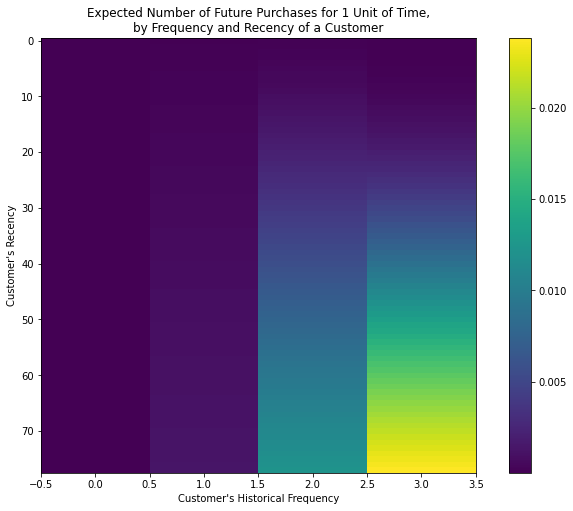

In [44]:
#Visualizing our frequency/recency matrix
%matplotlib inline
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_frequency_recency_matrix
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

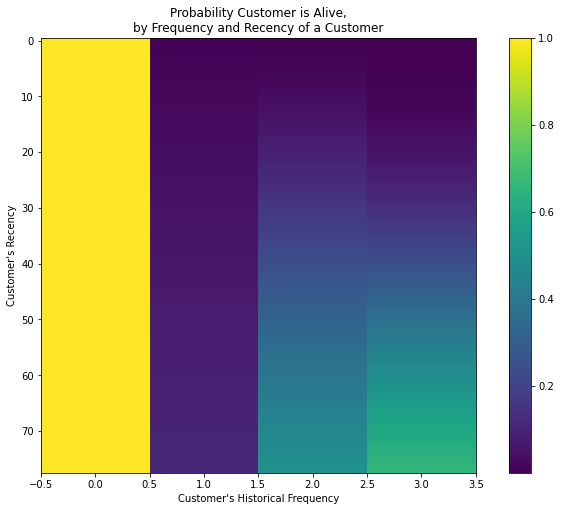

In [45]:
#predict if the customers are surely alive:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [46]:
#Predict future transaction in next 10 days i.e.top 10 customers that the model expects them to make purchases 
#in the next 10 days, based on historical data

t = 90
data_df['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, data_df['frequency'], data_df['recency'], data_df['T']),2)
data_df.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,index,ip,frequency,recency,T,pred_num_txn
0,2716,36.255.44.74,3.0,74.0,77.0,1.38
1,3279,66.249.66.210,2.0,25.0,25.0,1.36
2,3390,70.130.112.237,1.0,15.0,15.0,0.19
3,3138,51.81.116.103,1.0,23.0,29.0,0.12
4,340,121.66.144.141,1.0,39.0,41.0,0.12
5,1746,192.227.119.213,1.0,23.0,29.0,0.12
6,581,154.27.65.82,1.0,23.0,29.0,0.12
7,580,154.27.65.112,1.0,23.0,29.0,0.12
8,2169,209.236.122.58,1.0,23.0,29.0,0.12
9,3407,71.10.120.217,1.0,59.0,60.0,0.10


/usr/local/lib/python3.7/dist-packages/lifetimes/generate_data.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  next_purchase_in = random.exponential(scale=1.0 / l)
/usr/local/lib/python3.7/dist-packages/lifetimes/generate_data.py:54: RuntimeWarning: overflow encountered in double_scalars
  next_purchase_in = random.exponential(scale=1.0 / l)


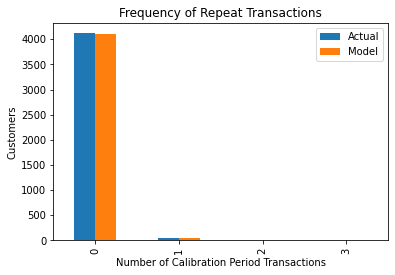

In [ ]:
#Assessing model fit
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [47]:
data_df.loc[2717]

ip              36.37.185.82
frequency                0.0
recency                  0.0
T                       68.0
pred_num_txn            0.01
Name: 2717, dtype: object

In [48]:
#Customer's future transaction prediction for next 10 days

t = 90
individual = data_df.loc[2717]
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

#OBSERVATION: Our model predicts that user 1.123.101.22 future visits in 90 days.

0.005202001482287274

#User Lifetime Value = Customer Value * Average Customer Lifespan

In [56]:
data_df['frequency'].value_counts()

0.0    4117
1.0      45
2.0       2
3.0       1
Name: frequency, dtype: int64

In [57]:
4117+45+2+1

4165

In [58]:
4117/4165

0.9884753901560625

### From this we can see a huge number of people have visited once. We will create a new 'churn' feature with values "yes" and "no"

In [75]:
data

,date,ip,app_name,app_ver,isp,connection_type,default_language,revenue
0,2022-08-05,97.118.20.38,Aquarium TV,V_s5.1.9b,CenturyLink,Cable/DSL,English,15
1,2022-08-05,189.203.104.188,ADULTish,V_s5.1.9b,Totalplay,Cable/DSL,English,15
2,2022-08-05,81.111.134.45,Aquarium TV,5.8.4,Virgin Media,Cable/DSL,English,15
3,2022-08-05,36.68.10.202,Culture Forward TV,5.8.4,PT Telkom Indonesia,Cable/DSL,English,15
4,2022-08-05,216.238.178.89,Aquarium TV,5.2.0,Auburn Essential Services,Cable/DSL,English,15
...,...,...,...,...,...,...,...,...
11875,2022-08-21,59.103.203.85,FashionTV+,5.2.0,Wancom (Pvt) Ltd.,Cable/DSL,English,15
11876,2022-08-21,2409:4043:2e1f:43a1:4d79:4211:d1c4:1049,FashionTV+,5.2.0,Jio,Cellular,English,15
11877,2022-08-21,2402:8100:3869:17f7:1:2:f3c3:7a9f,Short Box TV,5.2.0,Vodafone Idea,Cellular,English,15
11878,2022-08-21,2401:4900:3b1f:2da3:c131:11bd:f1f0:53d0,FashionTV+,5.2.0,Airtel,Cellular,English,15


In [76]:
data['counts'] = data.groupby(['ip'])['ip'].transform('count')


In [77]:
data[data['counts']>1]

,date,ip,app_name,app_ver,isp,connection_type,default_language,revenue,counts
6,2022-08-18,51.37.211.101,Ento live Network,5.8.4,Vodafone Ireland,Cable/DSL,English,15,2
16,2022-10-20,66.249.66.210,Channel Fight Masterclass,1.2.63,Googlebot,Corporate,English,15,3
156,2022-08-09,2404:3c00:b05f:c500:9c22:24be:497e:461f,Bob the train,5.1.8,Sky Cable,Cable/DSL,English,15,2
157,2022-08-09,46.39.65.243,Bob the train,5.1.8,Satellite Ltd,Cable/DSL,русский,15,3
160,2022-08-09,172.254.82.122,Fashion TV,V_s5.1.9b,Spectrum Business,Corporate,English,15,2
...,...,...,...,...,...,...,...,...,...
11664,2022-09-09,1.251.190.68,LifestyleMagazine,5.8.7,SK Broadband,Cable/DSL,English,15,2
11679,2022-08-05,73.148.252.242,Aquarium TV,V_s5.1.9b,Comcast Cable,Cable/DSL,English,15,2
11681,2022-08-05,24.250.34.126,Aquarium TV,V_s5.1.9a,Cox Communications,Cable/DSL,English,15,2
11868,2022-08-21,72.230.71.18,Wawkalak TV,V_s5.1.9b,Spectrum,Cable/DSL,English,15,2


In [78]:
#Creating new column Churn

def create_churn_value(data):
  if data['counts'] == 1:
    return 'Yes'
  else:
    return 'No'



In [79]:
data['churn'] = data.apply(lambda data: create_churn_value(data), axis=1)

In [81]:
data.head()

,date,ip,app_name,app_ver,isp,connection_type,default_language,revenue,counts,churn
0,2022-08-05,97.118.20.38,Aquarium TV,V_s5.1.9b,CenturyLink,Cable/DSL,English,15,1,Yes
1,2022-08-05,189.203.104.188,ADULTish,V_s5.1.9b,Totalplay,Cable/DSL,English,15,1,Yes
2,2022-08-05,81.111.134.45,Aquarium TV,5.8.4,Virgin Media,Cable/DSL,English,15,1,Yes
3,2022-08-05,36.68.10.202,Culture Forward TV,5.8.4,PT Telkom Indonesia,Cable/DSL,English,15,1,Yes
4,2022-08-05,216.238.178.89,Aquarium TV,5.2.0,Auburn Essential Services,Cable/DSL,English,15,1,Yes


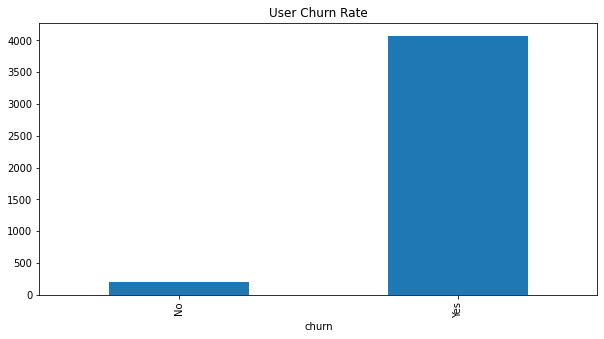

In [85]:
#check user frequency
#calculate sum of values by group
churn_cust = data.groupby(['churn'])['churn'].size()

#create bar plot by group
churn_cust.plot(kind='bar',  figsize=(10, 5), title='User Churn Rate')

In [88]:
len(data[data['churn']=='Yes'])

4070

In [90]:
len(data[data['churn']=='No'])

209

In [91]:
data['churn'].value_counts()

Yes    4070
No      209
Name: churn, dtype: int64

In [92]:
4070+209

4279

In [94]:
4070/4279

0.9511568123393316